<a href="https://colab.research.google.com/github/Yhadiii26/iris/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset de Iris
iris = load_iris()

# Crear un DataFrame de pandas con los datos y los nombres de las columnas
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Agregar la columna de especies (las "etiquetas" verdaderas)
df['species'] = iris.target_names[iris.target]

# Mostrar las primeras 5 filas para ver cómo se ven los datos
print("Primeras 5 filas del dataset:")
print(df.head())

# Mostrar un resumen estadístico de los datos
print("\nEstadísticas descriptivas:")
print(df.describe())

Primeras 5 filas del dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Estadísticas descriptivas:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%  

In [2]:
from sklearn.preprocessing import StandardScaler

# Separar las características de la especie
features = df.drop('species', axis=1)

# Normalizar los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print("\nPrimeras 5 filas de los datos normalizados:")
print(scaled_features[:5])


Primeras 5 filas de los datos normalizados:
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [3]:
from sklearn.cluster import KMeans

# Crear el modelo de K-Means con 3 clústeres
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Entrenar el modelo con los datos normalizados
kmeans.fit(scaled_features)

# Añadir el clúster para a cada flor
df['cluster_kmeans'] = kmeans.labels_

print("\nDataFrame con la nueva columna de clústeres:")
print(df.head())


DataFrame con la nueva columna de clústeres:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  cluster_kmeans  
0  setosa               1  
1  setosa               1  
2  setosa               1  
3  setosa               1  
4  setosa               1  


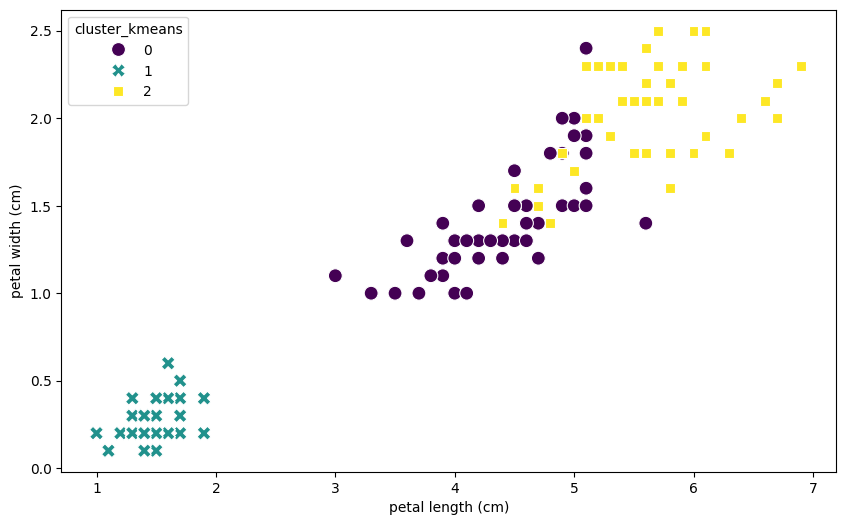


Comparación de Clústeres de K-Means vs. Especies Originales:
cluster_kmeans   0   1   2
species                   
setosa           0  50   0
versicolor      39   0  11
virginica       14   0  36


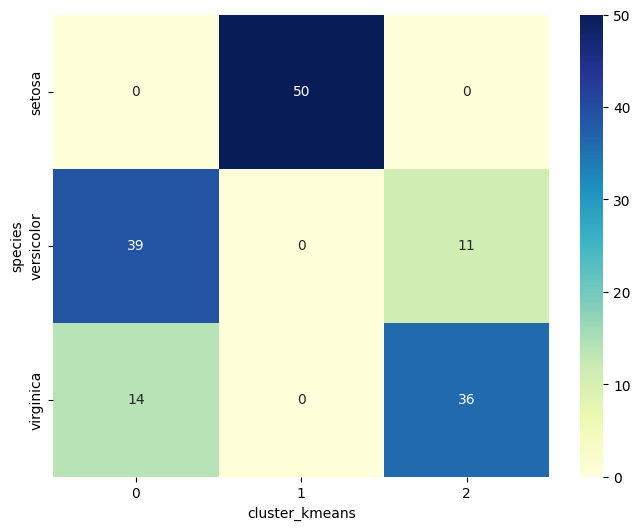

In [7]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='cluster_kmeans', data=df, palette='viridis', style='cluster_kmeans', s=100)
plt.show()

# Comparar los clústeres con las especies originales
print("\nComparación de Clústeres de K-Means vs. Especies Originales:")
# La tabla de contingencia nos ayuda a contar cuántas flores de cada especie cayeron en cada clúster
contingency_table = pd.crosstab(df['species'], df['cluster_kmeans'])
print(contingency_table)

# Visualizar la tabla con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.show()